In [1]:
# In[0.1]: Instalação dos pacotes

!pip install pandas
!pip install numpy
!pip install -U seaborn
!pip install matplotlib
!pip install plotly
!pip install scipy
!pip install statsmodels
!pip install scikit-learn
!pip install playsound
!pip install pingouin
!pip install emojis
!pip install statstests


In [14]:
#Importação dos pacotes

import pandas as pd # manipulação de dados em formato de dataframe
import numpy as np # operações matemáticas
import seaborn as sns # visualização gráfica
import matplotlib.pyplot as plt # visualização gráfica
import plotly.graph_objects as go # gráficos 3D
from scipy.stats import pearsonr # correlações de Pearson
import statsmodels.api as sm # estimação de modelos
from statsmodels.iolib.summary2 import summary_col # comparação entre modelos
from sklearn.preprocessing import LabelEncoder # transformação de dados
from playsound import playsound # reprodução de sons
import pingouin as pg # outro modo para obtenção de matrizes de correlações
import emojis # inserção de emojis em gráficos
from statstests.process import stepwise # procedimento Stepwise
from statstests.tests import shapiro_francia # teste de Shapiro-Francia
from scipy.stats import boxcox # transformação de Box-Cox
from scipy.stats import norm # para plotagem da curva normal
from scipy import stats # utilizado na definição da função 'breusch_pagan_test'
import warnings
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm


In [4]:
#############################################################################
#         DIAGNÓSTICO DE MULTICOLINEARIDADE EM MODELOS DE REGRESSÃO         #
#                EXEMPLO 6 - CARREGAMENTO DA BASE DE DADOS                  #
#############################################################################

O que é Multicolinearidade?

Multicolinearidade é uma situação em que duas ou mais variáveis independentes em um modelo de regressão se encontram altamente correlacionadas. Essa alta correlação pode afetar a qualidade dos resultados do modelo e dificultar a interpretação dos resultados.
Fica dificil de interpretar porque como há variáveis altamente correlacionadas, fica dificil saber qual é que realmente está contribuindo para a variação na variável dependente.

In [5]:
#Carregando os dados

caminho = 'D:\Documentos\Meus Documentos\Estudos\MBA\Data Science\Supervised Machine Learning Análise de Regressão Simples e Múltipla IV\Análise de Regressão Simples e Múltipla\salarios.csv'

df_salarios = pd.read_csv(caminho, delimiter=',')
df_salarios

,nome,salario,rh1,econometria1,rh2,econometria2
0,Patricia,2525.340820,3.0,9.0,9.0,4.50
1,Luiz,2498.574951,7.0,8.0,8.0,4.00
2,Dalila,2364.686768,10.0,9.5,9.5,4.75
3,Leonor,1981.349854,10.0,7.0,7.0,3.50
4,Ovidio,1892.807983,7.0,6.0,6.0,3.10
5,Paulo,1561.437378,8.0,3.0,3.0,2.00
6,Leticia,1660.850830,9.9,4.0,4.0,2.00
7,Gustavo,2001.654297,9.8,5.0,5.0,2.50
8,Mariana,2150.777588,3.0,8.0,8.0,4.00
9,Roberto,2148.177490,3.0,7.0,7.0,3.50


In [6]:
# Estatísticas univariadas
df_salarios.describe()

,salario,rh1,econometria1,rh2,econometria2
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,2032.150578,7.180000,6.400000,6.400000,3.240000
std,312.507361,3.169317,2.221647,2.221647,1.061367
min,1505.627563,1.400000,3.000000,3.000000,1.500000
25%,1870.515320,4.450000,4.500000,4.500000,2.250000
50%,2001.654297,8.000000,7.000000,7.000000,3.500000
75%,2219.607788,9.950000,8.000000,8.000000,4.000000
max,2525.340820,10.000000,9.500000,9.500000,4.750000


In [7]:
# In[6.1]: Matriz de correlações

correlation_matrix = df_salarios.iloc[:,1:6].corr()
correlation_matrix

,salario,rh1,econometria1,rh2,econometria2
salario,1.000000,-0.273192,0.909022,0.909022,0.897694
rh1,-0.273192,1.000000,-0.265076,-0.265076,-0.269104
econometria1,0.909022,-0.265076,1.000000,1.000000,0.993888
rh2,0.909022,-0.265076,1.000000,1.000000,0.993888
econometria2,0.897694,-0.269104,0.993888,0.993888,1.000000


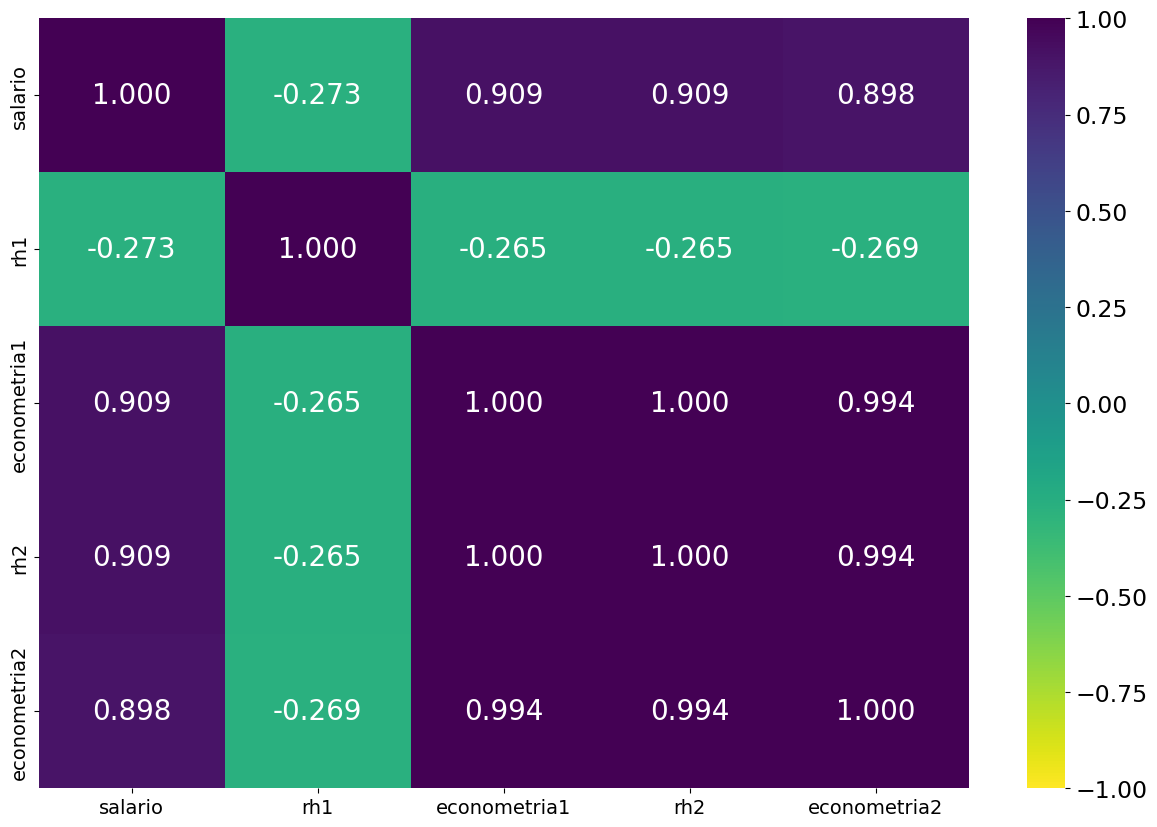

In [8]:
# Mapa de calor com as correlações entre todas as variáveis quantitativas
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".3f",
                      cmap=plt.cm.viridis_r,
                      annot_kws={'size': 20}, vmin=-1, vmax=1)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=17)
plt.show()

In [10]:
#CORRELAÇÃO BAIXA (variáveis 'rh1' e 'econometria1'):

# Correlação entre 'rh1' e 'econometria1', com p-value
corr1, p_value1 = pearsonr(df_salarios['rh1'], df_salarios['econometria1'])
"{:.4f}".format(corr1), "{:.4f}".format(p_value1)

# Matriz de correlação (maneira simples) pela função 'corr'
corr1 = df_salarios[['rh1','econometria1']].corr()
corr1

,rh1,econometria1
rh1,1.000000,-0.265076
econometria1,-0.265076,1.000000


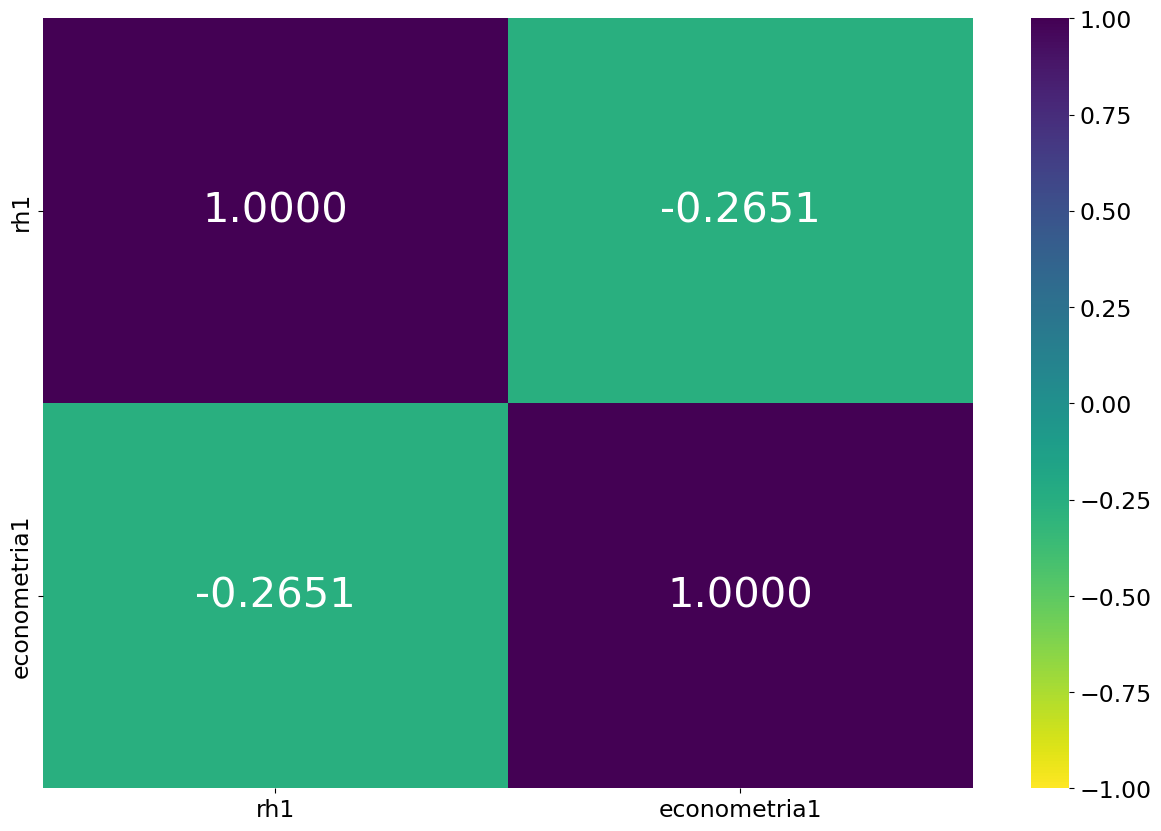

In [13]:
warnings.filterwarnings("ignore", category=FutureWarning)

corr1b = pg.rcorr(df_salarios[['rh1','econometria1']], method='pearson',
                  upper='pval', decimals=6,
                  pval_stars={0.01: '***',
                              0.05: '**',
                              0.10: '*'})
corr1b

# Mapa de calor com a correlação entre 'rh1' e 'econometria1'
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(corr1, annot=True, fmt=".4f",
                      cmap=plt.cm.viridis_r,
                      annot_kws={'size': 30}, vmin=-1, vmax=1)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=17)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=17)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=17)
plt.show()

C:\Users\alanm\AppData\Local\Temp\ipykernel_31288\1722733196.py:43: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=correlations,


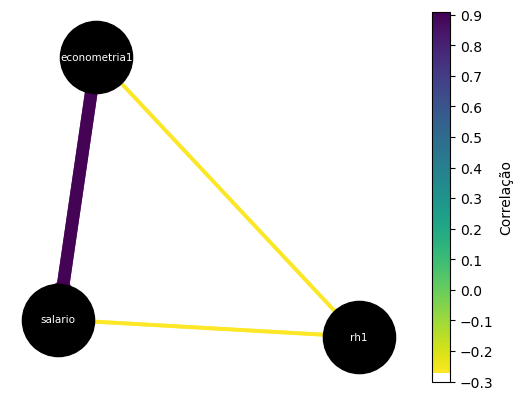

In [16]:
# In[6.3]: Grafo com a inter-relação entre as variáveis do dataframe 'df1'


df1 = df_salarios[['salario','rh1','econometria1']]
cormat1 = df1.corr()
cormat1

# Criação de um grafo direcionado
G = nx.DiGraph()

# Adição das variáveis como nós do grafo
for variable in cormat1.columns:
    G.add_node(variable)

# Adição das arestas com espessuras proporcionais às correlações
for i, variable1 in enumerate(cormat1.columns):
    for j, variable2 in enumerate(cormat1.columns):
        if i != j:
            correlation = cormat1.iloc[i, j]
            if abs(correlation) > 0:
                G.add_edge(variable1, variable2, weight=correlation)

# Obtenção da lista de correlações das arestas
correlations = [d["weight"] for _, _, d in G.edges(data=True)]

# Definição da dimensão dos nós
node_size = 2700

# Definição da cor dos nós
node_color = 'black'

# Definição da escala de cores das retas (correspondência com as correlações)
cmap = plt.colormaps.get_cmap('viridis_r')

# Criação de uma lista de espessuras das arestas proporcional às correlações
edge_widths = [abs(d["weight"]) * 10 for _, _, d in G.edges(data=True)]

# Criação do layout do grafo com maior distância entre os nós
pos = nx.spring_layout(G, k=0.75)  # k para controlar a distância entre os nós

# Desenho dos nós e das arestas com base nas correlações e espessuras
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color)
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=correlations,
                       edge_cmap=cmap, alpha=0.9)

# Adição dos rótulos dos nós
labels = {node: node for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels, font_size=7.5, font_color='white')

# Ajuste dos limites dos eixos
ax = plt.gca()
ax.margins(0.1)
plt.axis("off")

# Criação da legenda com a escala de cores definida
smp = cm.ScalarMappable(cmap=cmap)
smp.set_array([min(correlations), max(correlations)])
cbar = plt.colorbar(smp, ax=ax, label='Correlação')

# Definição dos ticks da colorbar
cbar.set_ticks(np.arange(round(min(correlations),1),
                         max(correlations), 0.1))

# Exibição do gráfico
plt.show()


Podemos observar que há uma correlação alta de salário com econometria. Salario com rh1 baixa, e o mesmo para econometria e rh1. 

In [17]:
# In[6.4]: Modelo 1 (salario em função de rh1 e econometria1)

modelo1 = sm.OLS.from_formula('salario ~ rh1 + econometria1', df_salarios).fit()

modelo1.summary()

c:\Users\alanm\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                salario   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     28.77
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           2.64e-05
Time:                        00:39:12   Log-Likelihood:                -93.759
No. Observations:                  15   AIC:                             193.5
Df Residuals:                      12   BIC:                             195.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1246.6172    163.783      7.611      0.000     889.765    1603.469
rh1             -3.4184     12.263     -0.279      0.785     -30.137      23.300
econometria1   126.5746     17.494      7.235      0.000      88.459     164.691
==============================================================================
Omnibus:                        1.817   Durbin-Watson:                   1.536
Prob(Omnibus):                  0.403   Jarque-Bera (JB):                1.396
Skew:                           0.597   Prob(JB):                        0.498
Kurtosis:                       2.101   Cond. No.                         45.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Podemos notar que temos um R^2 alto, o p value ( Prob (f-statistic)) é peelo menos um beta estatisticamente diferente de 0.
O rh1 não tem significancia estatistica para justificar o comportamento do salário. Ou seja provavelmente ele irá cair no procedimento stepwise.
Agora econometria tem relação com o salário. No caso esse foi o beta estatisticamente significante.

In [18]:
# Para fins de testes vamos fazer o Modelo 1 aux1 somente com a preditora 'rh1'

modelo1_aux1 = sm.OLS.from_formula('salario ~ rh1', df_salarios).fit()

modelo1_aux1.summary()

c:\Users\alanm\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                salario   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.048
Date:                Thu, 05 Sep 2024   Prob (F-statistic):              0.325
Time:                        00:46:59   Log-Likelihood:                -106.35
No. Observations:                  15   AIC:                             216.7
Df Residuals:                      13   BIC:                             218.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2225.5645    205.346     10.838      0.000    1781.942    2669.187
rh1          -26.9379     26.308     -1.024      0.325     -83.772      29.896
==============================================================================
Omnibus:                        1.302   Durbin-Watson:                   1.341
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                0.795
Skew:                           0.068   Prob(JB):                        0.672
Kurtosis:                       1.880   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Podemos ver que o R^2 despencou, não tem nenhum beta estatisticamente significante.
Essa é a primeira razão para uma variável sair, ela não ser estatisticamente significante.

In [19]:
#Será que o stepwise nos ajuda a resolver o problema ?

from statstests.process import stepwise

modelo1_step = stepwise(modelo1, pvalue_limit=0.05 )

Regression type: OLS 

Estimating model...: 
 salario ~ Q('rh1') + Q('econometria1')

 Discarding atribute "Q('rh1')" with p-value equal to 0.7851743044424165 

Estimating model...: 
 salario ~ Q('econometria1')

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': "Q('rh1')", 'p-value': 0.7851743044424165}

 Model after stepwise process...: 
 salario ~ Q('econometria1') 

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     61.85
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           2.69e-06
Time:                        00:50:46   Log-Likelihood:                -93.807
No. Observations:                  15   AIC:                             191.6
Df Residuals:      

c:\Users\alanm\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


É interessante deixar a lista das variáveis que cairam no modelo step wise, até mesmo para fins de pesquisa e argumentação quando for propor o modelo.
Só o R^2 não indica que o modelo é bom.

In [22]:
# E se fizermos o Modelo 1 aux2 somente com a preditora 'Econometria 1'

modelo1_aux2 = sm.OLS.from_formula('salario ~ econometria1', df_salarios).fit()

modelo1_aux2.summary() 

c:\Users\alanm\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                salario   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     61.85
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           2.69e-06
Time:                        01:05:23   Log-Likelihood:                -93.807
No. Observations:                  15   AIC:                             191.6
Df Residuals:                      13   BIC:                             193.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1213.7997    109.752     11.060      0.000     976.696    1450.904
econometria1   127.8673     16.259      7.865      0.000      92.742     162.992
==============================================================================
Omnibus:                        2.049   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.359   Jarque-Bera (JB):                1.492
Skew:                           0.601   Prob(JB):                        0.474
Kurtosis:                       2.028   Cond. No.                         21.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O resultado é igual ao modelo stepwise acima.

Agora vamos ver um outro conceito que é o diagnostico da multicolinearidade.

Temos um indicador chamado Tolerancia e outro chamado VIF

Se o VIF for baixo, teremos ausencia de multicolinearidade, VIF mais elevado significa existencia de multicolinearidade.

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculando os valores de VIF
X1 = sm.add_constant(df_salarios[['rh1', 'econometria1']])
VIF = pd.DataFrame()
VIF["Variável"] = X1.columns[1:]
VIF["VIF"] = [variance_inflation_factor(X1.values, i+1)
              for i in range(X1.shape[1]-1)]

# Calculando as Tolerâncias
VIF["Tolerância"] = 1 / VIF["VIF"]
VIF

,Variável,VIF,Tolerância
0,rh1,1.075576,0.929735
1,econometria1,1.075576,0.929735



                    rh2  econometria2
rh2           1.000000      0.993888
econometria2  0.993888      1.000000

                    rh2 econometria2
rh2                  -          ***
econometria2  0.993888            -


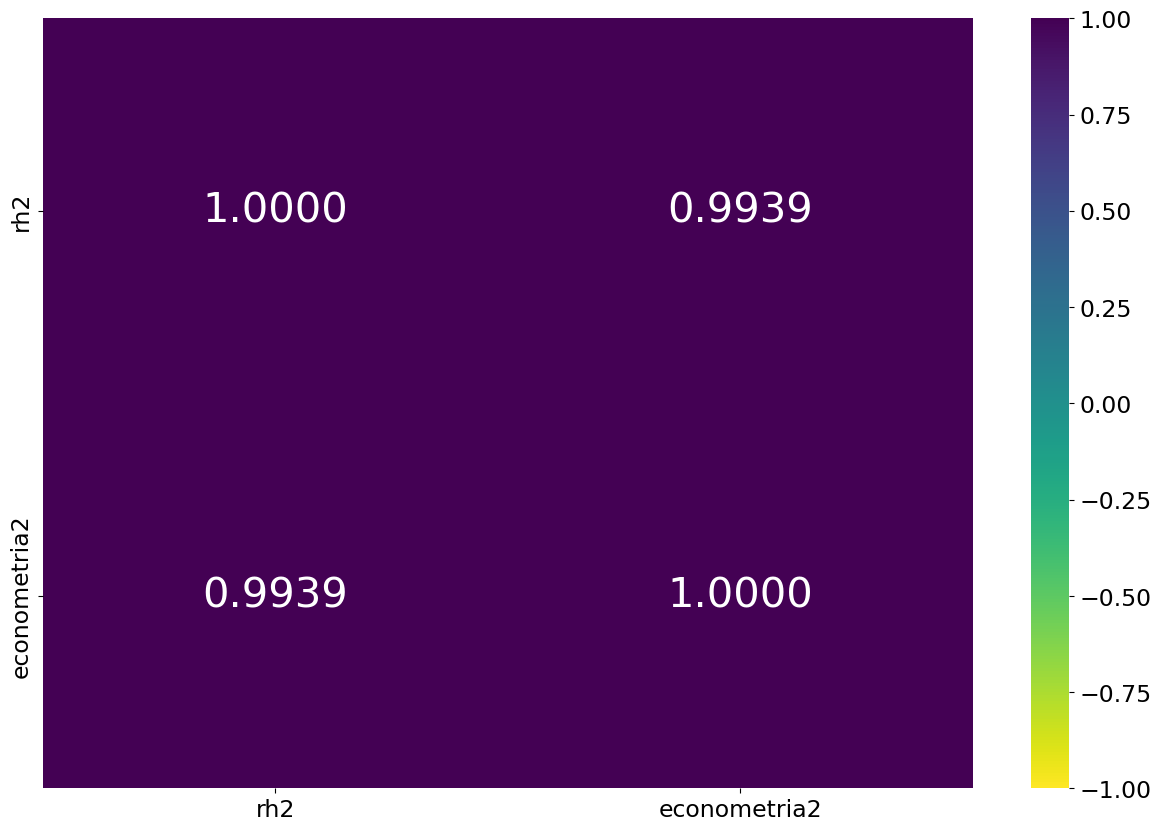

In [27]:
# In[6.6]: CORRELAÇÃO MUITO ALTA (variáveis 'rh2' e 'econometria2'):

# Correlação entre 'rh2' e 'econometria2', com p-value
corr2, p_value2 = pearsonr(df_salarios['rh2'], df_salarios['econometria2'])
"{:.4f}".format(corr2), "{:.4f}".format(p_value2)

# Matriz de correlação (maneira simples) pela função 'corr'
corr2 = df_salarios[['rh2','econometria2']].corr()
print("\n",corr2)

# Maneira mais elaborada pela função 'rcorr' do pacote 'pingouin'
import pingouin as pg

corr2b = pg.rcorr(df_salarios[['rh2','econometria2']], method='pearson',
                  upper='pval', decimals=6,
                  pval_stars={0.01: '***',
                              0.05: '**',
                              0.10: '*'})
print("\n",corr2b)

# Mapa de calor com a correlação entre 'rh2' e 'econometria2'
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(corr2, annot=True, fmt=".4f",
                      cmap=plt.cm.viridis_r,
                      annot_kws={'size': 30}, vmin=-1, vmax=1)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=17)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=17)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=17)
plt.show()


C:\Users\alanm\AppData\Local\Temp\ipykernel_31288\3749873820.py:46: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=correlations,


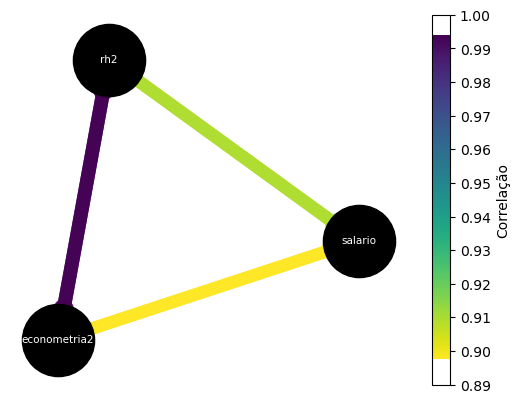

In [28]:
# In[6.7]: Grafo com a inter-relação entre as variáveis do dataframe 'df2'

df2 = df_salarios[['salario','rh2','econometria2']]
cormat2 = df2.corr()
cormat2

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Criação de um grafo direcionado
G = nx.DiGraph()

# Adição das variáveis como nós do grafo
for variable in cormat2.columns:
    G.add_node(variable)

# Adição das arestas com espessuras proporcionais às correlações
for i, variable1 in enumerate(cormat2.columns):
    for j, variable2 in enumerate(cormat2.columns):
        if i != j:
            correlation = cormat2.iloc[i, j]
            if abs(correlation) > 0:
                G.add_edge(variable1, variable2, weight=correlation)

# Obtenção da lista de correlações das arestas
correlations = [d["weight"] for _, _, d in G.edges(data=True)]

# Definição da dimensão dos nós
node_size = 2700

# Definição da cor dos nós
node_color = 'black'

# Definição da escala de cores das retas (correspondência com as correlações)
cmap = plt.colormaps.get_cmap('viridis_r')

# Criação de uma lista de espessuras das arestas proporcional às correlações
edge_widths = [abs(d["weight"]) * 10 for _, _, d in G.edges(data=True)]

# Criação do layout do grafo com maior distância entre os nós
pos = nx.spring_layout(G, k=0.75)  # k para controlar a distância entre os nós

# Desenho dos nós e das arestas com base nas correlações e espessuras
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color)
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=correlations,
                       edge_cmap=cmap, alpha=0.9)

# Adição dos rótulos dos nós
labels = {node: node for node in G.nodes}
nx.draw_networkx_labels(G, pos, labels, font_size=7.5, font_color='white')

# Ajuste dos limites dos eixos
ax = plt.gca()
ax.margins(0.1)
plt.axis("off")

# Criação da legenda com a escala de cores definida
smp = cm.ScalarMappable(cmap=cmap)
smp.set_array([min(correlations), max(correlations)])
cbar = plt.colorbar(smp, ax=ax, label='Correlação')

# Definição dos ticks da colorbar
cbar.set_ticks(np.arange(round(min(correlations) - 0.01,2),
                         max(correlations) + 0.01, 0.01))

# Exibição do gráfico
plt.show()

In [29]:
# In[6.8]: Modelo 2

modelo2 = sm.OLS.from_formula('salario ~ rh2 + econometria2', df_salarios).fit()

modelo2.summary()

c:\Users\alanm\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                salario   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     29.10
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           2.50e-05
Time:                        01:28:09   Log-Likelihood:                -93.688
No. Observations:                  15   AIC:                             193.4
Df Residuals:                      12   BIC:                             195.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1241.8527    130.172      9.540      0.000     958.233    1525.473
rh2            194.0845    152.087      1.276      0.226    -137.285     525.454
econometria2  -139.4577    318.348     -0.438      0.669    -833.079     554.164
==============================================================================
Omnibus:                        1.720   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.423   Jarque-Bera (JB):                1.309
Skew:                           0.554   Prob(JB):                        0.520
Kurtosis:                       2.068   Cond. No.                         75.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Temos que ter pelo menos um beta significante porém olhando a tabela, não temos nenhum beta significante

